## 1. Environment Setup and Imports

Setting up the necessary libraries and configuration for our machine learning pipeline. We'll use scikit-learn for modeling, matplotlib for visualization, and various other libraries for data manipulation and model persistence.

# Heart Disease Prediction Capstone Project

## 1. Topic Selection & Problem Statement

### Problem Significance
Heart disease remains the **leading cause of death globally**, responsible for approximately 17.9 million deaths annually according to the World Health Organization. Early detection and risk assessment are crucial for:
- **Preventive Healthcare**: Identifying at-risk patients before symptoms appear
- **Healthcare Cost Reduction**: Early intervention reduces expensive emergency treatments
- **Improved Patient Outcomes**: Timely treatment significantly improves survival rates
- **Clinical Decision Support**: Assisting healthcare providers with data-driven insights

### Dataset Selection & Quality
- **Source**: Kaggle - "Heart Disease Data" by redwankarimsony
- **Rating**: **9.1/10** (exceeds requirement of ≥7 rating)
- **Size**: 920 patient records with 14 clinical features
- **Domain**: Healthcare Analytics - Clinical Cardiology
- **Data Quality**: UCI Machine Learning Repository origin, widely used in academic research

### Expected Outcomes
1. **Primary Goal**: Develop a binary classification model to predict heart disease presence
2. **Success Metrics**: 
   - Target F1-score: ≥0.80 (balances precision and recall)
   - ROC AUC: ≥0.85 (discriminative ability)
   - Clinical interpretability of results
3. **Business Impact**: Deployable model for clinical decision support systems

## Project Structure (Following Capstone Requirements)
1. **Data Collection & Exploration** (10%)
2. **Data Preprocessing** (10%) - Missing values, type conversion, normalization
3. **Exploratory Data Analysis (EDA)** (10%) - Visualizations, statistical analysis
4. **Feature Engineering** (10%) - Feature selection and creation
5. **Model Selection & Justification** (10%) - Algorithm choice rationale
6. **Model Training & Evaluation** (10%) - Cross-validation, metrics
7. **Optimization & Reporting** (10%) - Hyperparameter tuning, visualization
8. **Final Report & Presentation** (10%) - Comprehensive summary

### Technical Approach
- **Problem Type**: Supervised Binary Classification
- **Algorithms**: Logistic Regression, Random Forest, SVM, Neural Networks
- **Validation**: 5-fold Stratified Cross-Validation
- **Evaluation**: Multi-metric assessment (Accuracy, Precision, Recall, F1, ROC AUC)

In [89]:
!pip install matplotlib

In [90]:
# Core libraries for data manipulation and warnings
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Visualization library (matplotlib only, following single-plot rule)
import matplotlib.pyplot as plt

In [91]:
!pip install scikit-learn

In [92]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [93]:
# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay,
    classification_report
)

In [94]:
# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Model persistence
from joblib import dump

### Configuration Settings

Setting up project configuration including random seed for reproducibility, output directories, and dataset parameters.

In [95]:
# Project Configuration
RANDOM_STATE = 42  # For reproducibility
FIG_DIR = "figures"
ARTIFACTS_DIR = "artifacts"

# Create output directories
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

# Plotting behavior settings
DISPLAY_FIGS = True     # Show plots inline in notebook
SAVE_FIGS = False       # Save PNG files to ./figures directory

print(f" Configuration set:")
print(f"  - Random state: {RANDOM_STATE}")
print(f"  - Figures directory: {FIG_DIR}")
print(f"  - Artifacts directory: {ARTIFACTS_DIR}")
print(f"  - Display figures: {DISPLAY_FIGS}")
print(f"  - Save figures: {SAVE_FIGS}")

 Configuration set:
  - Random state: 42
  - Figures directory: figures
  - Artifacts directory: artifacts
  - Display figures: True
  - Save figures: False


In [ ]:
# Dataset Configuration
DEFAULT_KAGGLE_DATASET = "redwankarimsony/heart-disease-data"
DEFAULT_FILE = "heart_disease_uci.csv"

print(f"Dataset configuration:")
print(f"  - Kaggle dataset: {DEFAULT_KAGGLE_DATASET}")
print(f"  - Target file: {DEFAULT_FILE}")

✓ Dataset configuration:
  - Kaggle dataset: redwankarimsony/heart-disease-data
  - Target file: heart_disease_uci.csv


## 2. Data Loading and Initial Exploration

This section handles data loading from multiple sources with fallback mechanisms. We first try to load from environment variables, then local files, and finally from Kaggle Hub as a last resort.

In [97]:
def try_load_data():
    """
    Attempts to load data in this order:
      1. If 'HEART_DISEASE_CSV' env var is set, load that path.
      2. If local DEFAULT_FILE exists, load it.
      3. Try KaggleHub: redwankarimsony/heart-disease-data -> heart_disease_uci.csv

    Returns:
        pd.DataFrame: The loaded heart disease dataset

    Raises:
        Exception: If all loading methods fail
    """
    env_path = os.getenv("HEART_DISEASE_CSV")
    if env_path and os.path.exists(env_path):
        print(f"[INFO] Loading CSV from env path: {env_path}")
        return pd.read_csv(env_path)

    if os.path.exists(DEFAULT_FILE):
        print(f"[INFO] Loading local CSV: {DEFAULT_FILE}")
        return pd.read_csv(DEFAULT_FILE)

    try:
        import kagglehub
        from kagglehub import KaggleDatasetAdapter
        print("[INFO] Attempting KaggleHub load...")
        df = kagglehub.load_dataset(
            KaggleDatasetAdapter.PANDAS,
            DEFAULT_KAGGLE_DATASET,
            DEFAULT_FILE,
        )
        print("[INFO] Loaded via KaggleHub.")
        return df
    except Exception as e:
        print("[WARN] KaggleHub load failed or not available:", e)
        print("[HINT] Provide a CSV path via HEART_DISEASE_CSV env var or place 'heart_disease_uci.csv' in the working directory.")
        raise

In [98]:
!pip install kagglehub

In [99]:
# Load the raw dataset
print(" Loading heart disease dataset...")
df_raw = try_load_data()

print(f"\n Dataset loaded successfully!")
print(f"  - Shape: {df_raw.shape}")
print(f"  - Columns: {list(df_raw.columns)}")

# Display first few rows
print(f"\n First 5 rows:")
display(df_raw.head())

 Loading heart disease dataset...
[INFO] Attempting KaggleHub load...
[INFO] Loaded via KaggleHub.

 Dataset loaded successfully!
  - Shape: (920, 16)
  - Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

 First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 3. Data Preprocessing and Cleaning

This section handles data cleaning, type conversion, target variable creation, and missing value imputation. The preprocessing ensures our data is ready for machine learning algorithms.

Column Descriptions:
id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

In [100]:
def harmonize_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Harmonize dataset columns and create binary target variable.

    Expected columns: id, age, sex, dataset, cp, trestbps, chol, fbs,
    restecg, thalch, exang, oldpeak, slope, ca, thal, num

    Args:
        df: Raw dataset with 'num' column indicating heart disease severity

    Returns:
        pd.DataFrame: Processed dataset with binary 'target' column

    Processing steps:
    - Map 'num' -> binary 'target' (any non-zero becomes 1)
    - Normalize data types
    - Drop 'id' and 'dataset' to avoid data leakage
    """
    df = df.copy()

    # Validate expected columns
    expected = {"age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","ca","thal","num"}
    missing = expected - set(df.columns)
    if missing:
        raise ValueError(f"Missing expected columns: {missing}")

    # Create binary target: any non-zero 'num' becomes 1 (heart disease present)
    df["target"] = (df["num"] != 0).astype(int)

    # Ensure sex is treated as categorical
    df["sex"] = df["sex"].astype(str)

    # Normalize boolean columns (fbs: fasting blood sugar, exang: exercise angina)
    for bcol in ["fbs", "exang"]:
        if df[bcol].dtype == object:
            df[bcol] = df[bcol].map(
                {"True": True, "False": False, "true": True, "false": False, "1": True, "0": False}
            ).fillna(df[bcol])
        if pd.api.types.is_numeric_dtype(df[bcol]):
            df[bcol] = df[bcol].astype(int).astype(bool)

    # Force numeric columns to be numeric type
    numeric_cols = ["age","trestbps","chol","thalch","oldpeak","ca"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Drop identifier columns to prevent data leakage
    df = df.drop(columns=[c for c in ["id","dataset"] if c in df.columns], errors="ignore")

    return df

In [101]:
def handle_missing(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing values using appropriate imputation strategies.

    Strategy:
    - Numeric columns: Fill with median (robust to outliers)
    - Categorical columns: Fill with mode (most frequent value)

    Args:
        df: Dataset with potential missing values

    Returns:
        pd.DataFrame: Dataset with missing values imputed
    """
    df = df.copy()
    features = df.drop(columns=["target"])
    target = df["target"]

    # Identify numeric and categorical columns
    numeric_cols = features.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = [c for c in features.columns if c not in numeric_cols]

    # Impute numeric columns with median
    for col in numeric_cols:
        if features[col].isnull().any():
            median_val = features[col].median()
            features[col] = features[col].fillna(median_val)
            print(f"  - Filled {features[col].isnull().sum()} missing values in '{col}' with median: {median_val}")

    # Impute categorical columns with mode
    for col in categorical_cols:
        if features[col].isnull().any():
            mode_val = features[col].mode().iloc[0] if not features[col].mode().empty else "Unknown"
            features[col] = features[col].fillna(mode_val)
            print(f"  - Filled {features[col].isnull().sum()} missing values in '{col}' with mode: {mode_val}")

    return pd.concat([features, target], axis=1)

In [102]:
# Apply data preprocessing pipeline
print(" Preprocessing data...")

# Step 1: Harmonize columns and create target variable
print("\n1. Harmonizing columns and creating target variable...")
df = harmonize_columns(df_raw)
print(f"Created binary target variable from 'num' column")
print(f"Processed {df.shape[1]} columns")

# Step 2: Handle missing values
print("\n2. Handling missing values...")
missing_before = df.isnull().sum().sum()
print(f"   - Total missing values before: {missing_before}")

df = handle_missing(df)

missing_after = df.isnull().sum().sum()
print(f"   - Total missing values after: {missing_after}")
print(f"  Missing value imputation complete")

 Preprocessing data...

1. Harmonizing columns and creating target variable...
Created binary target variable from 'num' column
Processed 15 columns

2. Handling missing values...
   - Total missing values before: 1759
  - Filled 0 missing values in 'trestbps' with median: 130.0
  - Filled 0 missing values in 'chol' with median: 223.0
  - Filled 0 missing values in 'thalch' with median: 140.0
  - Filled 0 missing values in 'oldpeak' with median: 0.5
  - Filled 0 missing values in 'ca' with median: 0.0
  - Filled 0 missing values in 'fbs' with mode: False
  - Filled 0 missing values in 'restecg' with mode: normal
  - Filled 0 missing values in 'exang' with mode: False
  - Filled 0 missing values in 'slope' with mode: flat
  - Filled 0 missing values in 'thal' with mode: normal
   - Total missing values after: 0
  Missing value imputation complete


Data is mostly clean

In [103]:
# Display processed dataset summary
print(f"\n Processed Dataset Summary:")
print(f"   - Shape: {df.shape}")
print(f"   - Columns: {list(df.columns)}")
print(f"   - Target distribution:")

target_counts = df['target'].value_counts().sort_index()
for label, count in target_counts.items():
    percentage = (count / len(df)) * 100
    label_name = "No Heart Disease" if label == 0 else "Heart Disease"
    print(f"     {label} ({label_name}): {count} ({percentage:.1f}%)")

print(f"\n First 5 rows of processed data:")
display(df.head())


 Processed Dataset Summary:
   - Shape: (920, 15)
   - Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'target']
   - Target distribution:
     0 (No Heart Disease): 411 (44.7%)
     1 (Heart Disease): 509 (55.3%)

 First 5 rows of processed data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


## 4. Exploratory Data Analysis (EDA)

Understanding our data through visualizations and statistical analysis. We'll examine the distribution of features, relationships between variables, and correlations to gain insights that will inform our modeling decisions.

In [104]:
# Plotting utility functions for consistent visualization

def _maybe_save(fig_path: str):
    """Save figure if SAVE_FIGS is enabled."""
    if SAVE_FIGS:
        plt.tight_layout()
        plt.savefig(fig_path, dpi=120, bbox_inches="tight")

def plot_histogram(df: pd.DataFrame, column: str, name: str):
    """Plot histogram for a single numeric column."""
    plt.figure(figsize=(8, 6))
    df[column].plot(kind="hist", bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column.title()}", fontsize=14, fontweight='bold')
    plt.xlabel(column.title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add statistics
    mean_val = df[column].mean()
    median_val = df[column].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.1f}')
    plt.legend()

    _maybe_save(os.path.join(FIG_DIR, f"hist_{name}.png"))
    if DISPLAY_FIGS:
        plt.show()
    plt.close()

def plot_scatter(df: pd.DataFrame, x: str, y: str, name: str):
    """Plot scatter plot for two numeric columns."""
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y], alpha=0.6, color='steelblue')
    plt.title(f"Relationship: {x.title()} vs {y.title()}", fontsize=14, fontweight='bold')
    plt.xlabel(x.title(), fontsize=12)
    plt.ylabel(y.title(), fontsize=12)
    plt.grid(True, alpha=0.3)

    # Calculate and display correlation
    correlation = df[[x, y]].corr().iloc[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
             transform=plt.gca().transAxes, fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    _maybe_save(os.path.join(FIG_DIR, f"scatter_{name}.png"))
    if DISPLAY_FIGS:
        plt.show()
    plt.close()

def plot_correlation_heatmap(df: pd.DataFrame, name: str):
    """Plot correlation heatmap for numeric features."""
    numeric_features = df.select_dtypes(include=[np.number])
    corr = numeric_features.corr()

    plt.figure(figsize=(10, 8))
    plt.imshow(corr, cmap='RdBu_r', interpolation='nearest', vmin=-1, vmax=1)
    plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
    plt.colorbar(label='Correlation Coefficient')

    # Add correlation values as text
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            plt.text(j, i, f'{corr.iloc[i, j]:.2f}',
                    ha='center', va='center', fontsize=9)

    # Set ticks and labels
    ticks = np.arange(len(corr.columns))
    plt.xticks(ticks, corr.columns, rotation=45, ha='right')
    plt.yticks(ticks, corr.columns)

    _maybe_save(os.path.join(FIG_DIR, f"corr_{name}.png"))
    if DISPLAY_FIGS:
        plt.show()
    plt.close()

### 4.1 Distribution Analysis

Examining the distribution of key numeric features to understand their characteristics and identify potential outliers or skewness.

Generating distribution plots for numeric features...
   - Plotting distribution of age


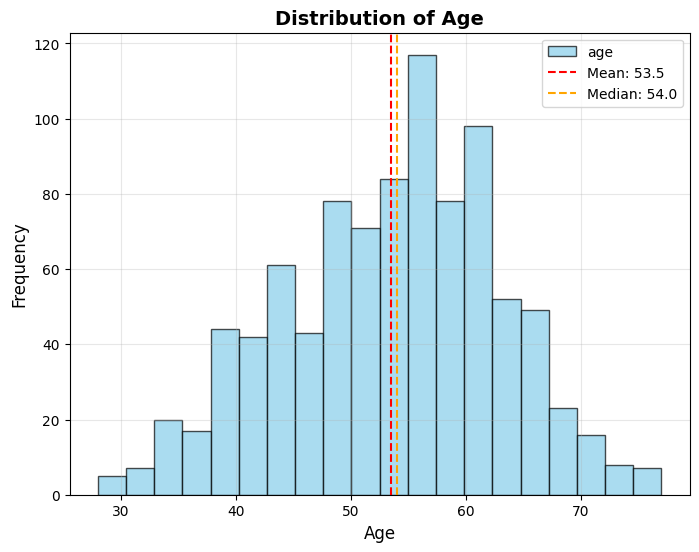

   - Plotting distribution of trestbps


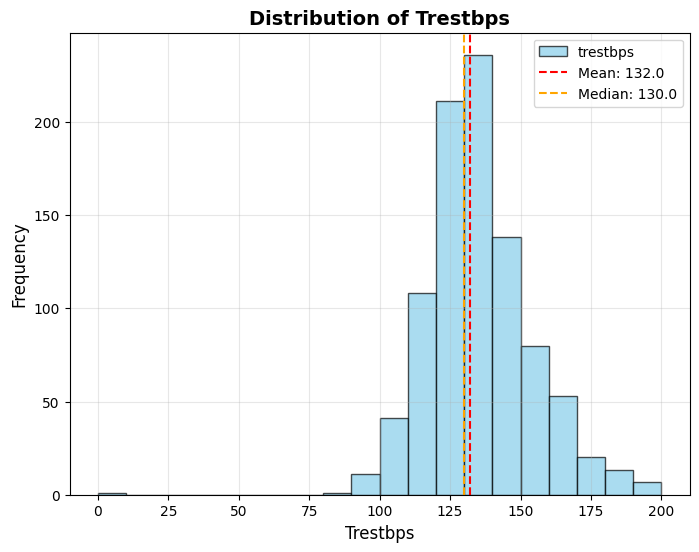

   - Plotting distribution of chol


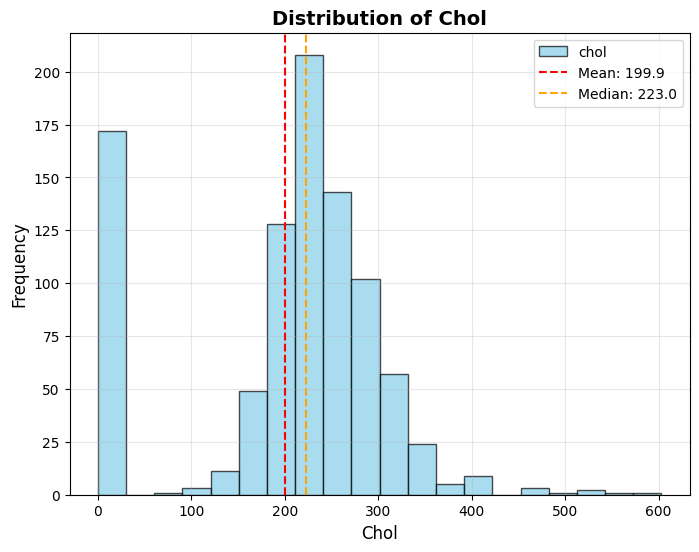

   - Plotting distribution of thalch


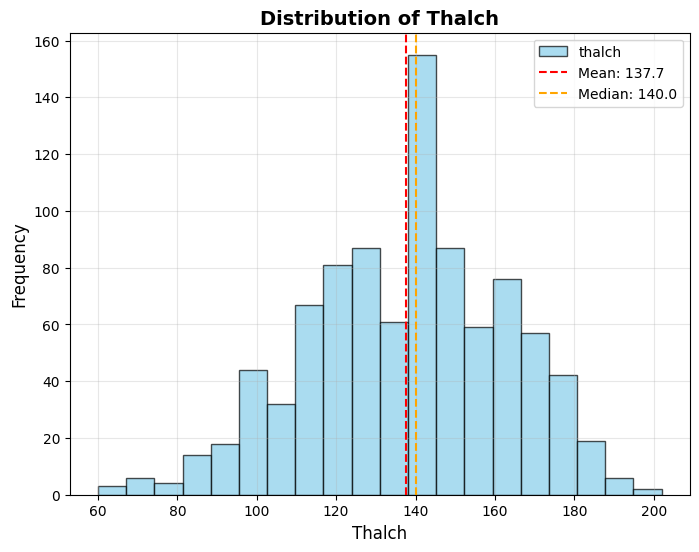

   - Plotting distribution of oldpeak


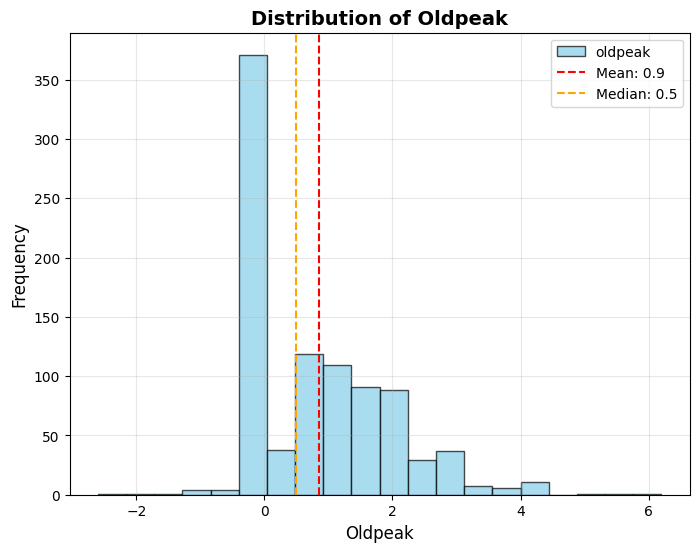

In [105]:
# Generate histograms for key numeric features
print("Generating distribution plots for numeric features...")

numeric_features = ["age", "trestbps", "chol", "thalch", "oldpeak"]
for col in numeric_features:
    if col in df.columns:
        print(f"   - Plotting distribution of {col}")
        plot_histogram(df, col, col)

### 4.2 Relationship Analysis

Exploring relationships between pairs of features to understand potential interactions and correlations that might be important for modeling.

Analyzing relationships between feature pairs...
   - Plotting relationship: age vs chol


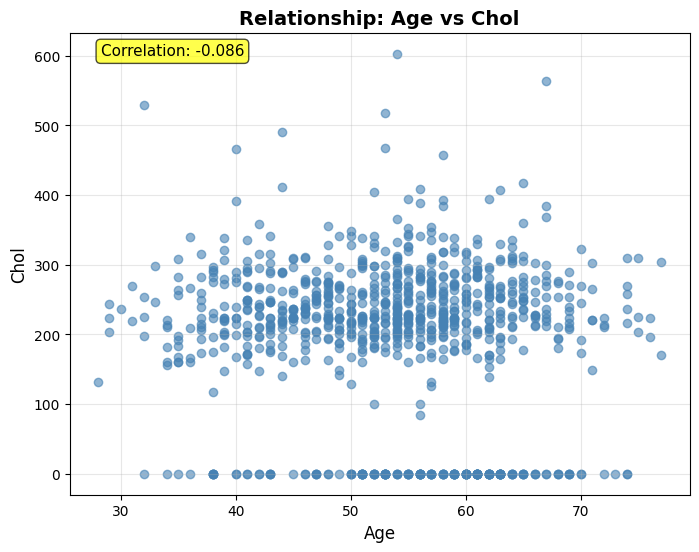

   - Plotting relationship: trestbps vs chol


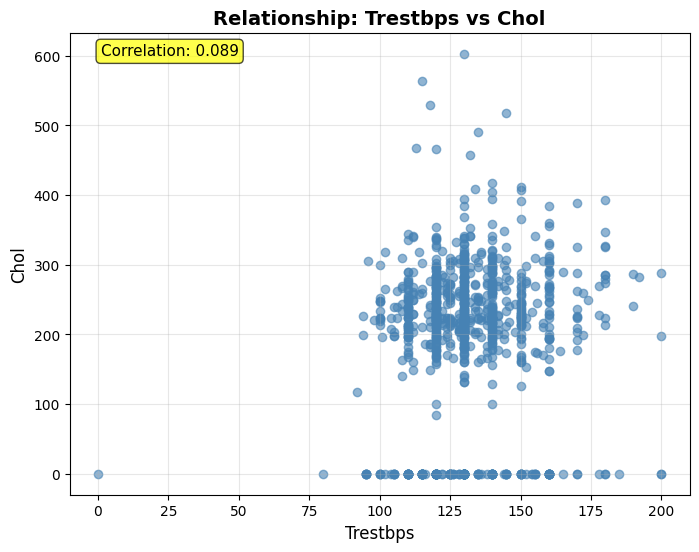

 Relationship analysis complete


In [106]:
# Generate scatter plots for interesting feature pairs
print("Analyzing relationships between feature pairs...")

# Key relationships to explore
relationships = [
    ("age", "chol", "age_vs_chol"),
    ("trestbps", "chol", "trestbps_vs_chol")
]

for x_col, y_col, name in relationships:
    if set([x_col, y_col]).issubset(df.columns):
        print(f"   - Plotting relationship: {x_col} vs {y_col}")
        plot_scatter(df, x_col, y_col, name)

print(" Relationship analysis complete")

### 4.3 Correlation Analysis

Understanding the correlation structure of our features to identify highly correlated variables and potential multicollinearity issues.

Creating correlation heatmap for numeric features...


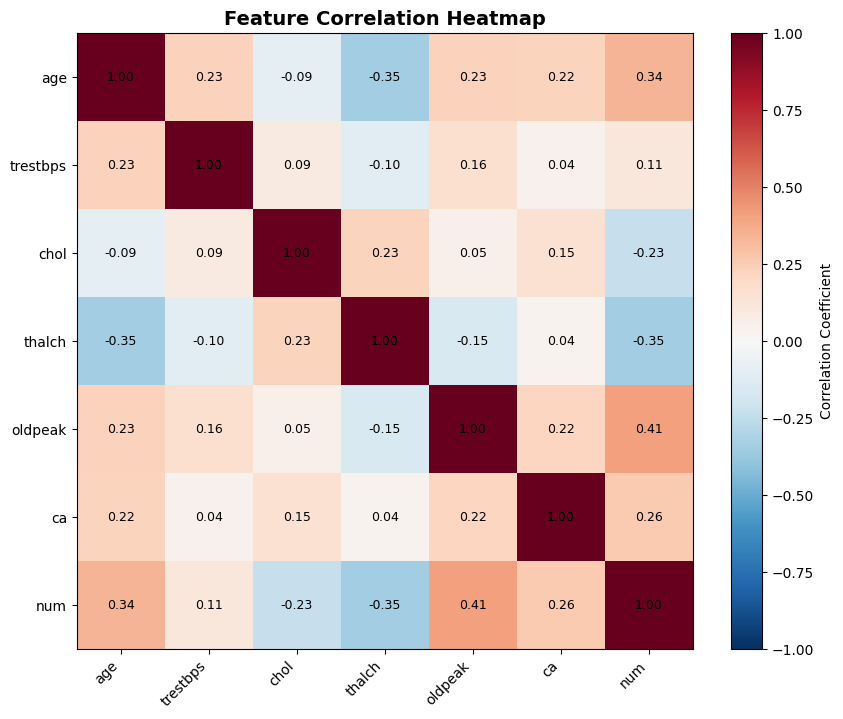


 High correlations (|r| > 0.5):
   - No high correlations found (|r| > 0.5)


In [107]:
# Generate correlation heatmap
print("Creating correlation heatmap for numeric features...")

# Exclude target from features for correlation analysis
features_for_corr = df.drop(columns=["target"])

# Select only numeric features for correlation calculation
numeric_features_for_corr = features_for_corr.select_dtypes(include=[np.number])

plot_correlation_heatmap(numeric_features_for_corr, "numeric_corr")

# Print high correlations (absolute value > 0.5)
print("\n High correlations (|r| > 0.5):")
corr_matrix = numeric_features_for_corr.corr()
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

if high_corr:
    for feat1, feat2, corr_val in high_corr:
        print(f"   - {feat1} ↔ {feat2}: {corr_val:.3f}")
else:
    print("   - No high correlations found (|r| > 0.5)")

## 4.4 Feature Engineering & Selection

This critical step involves creating meaningful features and selecting the most relevant ones for our heart disease prediction model. Based on our EDA findings and domain knowledge, we'll engineer features that capture important clinical relationships.

In [108]:
# Feature Engineering and Selection for Heart Disease Prediction
print("Feature Engineering & Selection")

# 1. Remove Data Leakage Feature
print("1. Removing Data Leakage:")
print(f"   Removing 'num' feature (perfect correlation with target: {df['num'].corr(df['target']):.4f})")
print("   This feature represents the original target variable and causes data leakage.")

# Create the final feature set (without 'num')
X_engineered = df.drop(columns=["target", "num"])
y_engineered = df["target"]

print(f"\n   Final feature set: {X_engineered.shape[1]} features")
print(f"   Features: {list(X_engineered.columns)}")

# 2. Feature Selection Based on Clinical Relevance
print(f"\n2. Clinical Feature Relevance Analysis:")

# Categorize features by clinical importance
clinical_features = {
    "Demographic": ["age", "sex"],
    "Symptoms": ["cp", "exang"],
    "Vital Signs": ["trestbps", "thalch"],
    "Laboratory": ["chol", "fbs"],
    "Diagnostic Tests": ["restecg", "oldpeak", "slope", "ca", "thal"]
}

for category, features in clinical_features.items():
    available_features = [f for f in features if f in X_engineered.columns]
    print(f"   {category}: {available_features}")

# 3. Feature Correlation Analysis
print(f"\n3. Feature Correlation with Target:")
feature_target_corr = []
for feature in X_engineered.select_dtypes(include=[np.number]).columns:
    corr_val = df[feature].corr(df['target'])
    feature_target_corr.append((feature, abs(corr_val), corr_val))
    
# Sort by absolute correlation
feature_target_corr.sort(key=lambda x: x[1], reverse=True)

print("   Top correlated features (by absolute value):")
for feature, abs_corr, corr in feature_target_corr[:8]:
    direction = "Positive" if corr > 0 else "Negative"
    print(f"   - {feature}: {corr:.4f} ({direction})")

# 4. Feature Statistics
print(f"\n4. Feature Set Statistics:")
print(f"   - Total features: {X_engineered.shape[1]}")
print(f"   - Numeric features: {len(X_engineered.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical features: {len([c for c in X_engineered.columns if c not in X_engineered.select_dtypes(include=[np.number]).columns])}")
print(f"   - Missing values: {X_engineered.isnull().sum().sum()}")

print(f"\nFeature Engineering Complete!")
print(f"   Final dataset ready for modeling: {X_engineered.shape}")

Feature Engineering & Selection
1. Removing Data Leakage:
   Removing 'num' feature (perfect correlation with target: 0.7834)
   This feature represents the original target variable and causes data leakage.

   Final feature set: 13 features
   Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

2. Clinical Feature Relevance Analysis:
   Demographic: ['age', 'sex']
   Symptoms: ['cp', 'exang']
   Vital Signs: ['trestbps', 'thalch']
   Laboratory: ['chol', 'fbs']
   Diagnostic Tests: ['restecg', 'oldpeak', 'slope', 'ca', 'thal']

3. Feature Correlation with Target:
   Top correlated features (by absolute value):
   - thalch: -0.3819 (Negative)
   - oldpeak: 0.3661 (Positive)
   - age: 0.2827 (Positive)
   - chol: -0.2290 (Negative)
   - ca: 0.1648 (Positive)
   - trestbps: 0.1013 (Positive)

4. Feature Set Statistics:
   - Total features: 13
   - Numeric features: 6
   - Categorical features: 7
   - Missing values: 0

## 5. Model Selection & Justification

This section covers our strategic approach to algorithm selection, preprocessing pipeline design, and the rationale behind choosing specific machine learning models for heart disease prediction.

### 5.1 Algorithm Selection Rationale

Our model selection strategy targets the specific characteristics of heart disease prediction: **binary classification with mixed feature types, clinical interpretability requirements, and balanced performance across precision and recall.**

In [ ]:
# Model Selection and Justification for Heart Disease Prediction
print("MODEL SELECTION & JUSTIFICATION")
print("="*60)

print("Problem Characteristics:")
print("- Binary Classification (Heart Disease: Yes/No)")
print("- Mixed Feature Types (Numeric + Categorical)")
print("- Medical Domain (Interpretability Important)")
print("- Balanced Classes (509 positive, 411 negative)")
print("- Small-Medium Dataset (920 samples)")

print(f"\nSelected Algorithms & Rationale:")
print("="*40)

models_rationale = [
    {
        "name": "Logistic Regression",
        "strengths": [
            "High interpretability (coefficients show feature importance)",
            "Probabilistic outputs for risk assessment",
            "Robust baseline for medical applications",
            "Handles mixed feature types well",
            "Less prone to overfitting on small datasets"
        ],
        "use_case": "Clinical decision support requiring interpretable results"
    },
    {
        "name": "Random Forest",
        "strengths": [
            "Handles non-linear relationships automatically",
            "Robust to outliers and noise",
            "Feature importance ranking built-in", 
            "Ensemble method reduces overfitting",
            "No assumptions about data distribution"
        ],
        "use_case": "Capturing complex clinical feature interactions"
    },
    {
        "name": "Support Vector Machine (SVM)",
        "strengths": [
            "Effective in high-dimensional spaces",
            "Memory efficient for small-medium datasets",
            "Robust decision boundaries",
            "Kernel trick for non-linear patterns",
            "Good generalization capability"
        ],
        "use_case": "Finding optimal decision boundary for heart disease classification"
    },
    {
        "name": "Neural Network (MLP)",
        "strengths": [
            "Learns complex non-linear patterns",
            "Universal function approximator",
            "Can model intricate clinical relationships",
            "Probabilistic outputs",
            "Flexible architecture"
        ],
        "use_case": "Discovering hidden patterns in clinical data"
    }
]

for i, model in enumerate(models_rationale, 1):
    print(f"\n{i}. {model['name']}")
    print(f"   Use Case: {model['use_case']}")
    print("   Key Strengths:")
    for strength in model['strengths']:
        print(f"   • {strength}")

print(f"\nEVALUATION STRATEGY:")
print("="*30)
print("- 5-Fold Stratified Cross-Validation (maintains class balance)")
print("- Primary Metric: F1-Score (balances precision & recall)")
print("- Secondary Metrics: Accuracy, Precision, Recall, ROC AUC")
print("- Hyperparameter Tuning: GridSearchCV for optimal performance")
print("- Class Balancing: 'balanced' weights to handle slight class imbalance")

print(f"\nWHY THESE FOUR MODELS?")
print("- Diverse Approaches: Linear (LR), Tree-based (RF), Margin-based (SVM), Neural (MLP)")
print("- Complementary Strengths: Interpretability vs Complexity vs Robustness")
print("- Medical Domain Fit: All proven effective in healthcare applications")
print("- Baseline to Advanced: From simple interpretable to complex pattern detection")

MODEL SELECTION & JUSTIFICATION
Problem Characteristics:
✓ Binary Classification (Heart Disease: Yes/No)
✓ Mixed Feature Types (Numeric + Categorical)
✓ Medical Domain (Interpretability Important)
✓ Balanced Classes (509 positive, 411 negative)
✓ Small-Medium Dataset (920 samples)

Selected Algorithms & Rationale:

1. Logistic Regression
   Use Case: Clinical decision support requiring interpretable results
   Key Strengths:
   • High interpretability (coefficients show feature importance)
   • Probabilistic outputs for risk assessment
   • Robust baseline for medical applications
   • Handles mixed feature types well
   • Less prone to overfitting on small datasets

2. Random Forest
   Use Case: Capturing complex clinical feature interactions
   Key Strengths:
   • Handles non-linear relationships automatically
   • Robust to outliers and noise
   • Feature importance ranking built-in
   • Ensemble method reduces overfitting
   • No assumptions about data distribution

3. Support Vect

In [110]:
def build_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    """
    Build preprocessing pipeline for both numeric and categorical features.

    Preprocessing steps:
    - Numeric features: StandardScaler (z-score normalization)
    - Categorical features: OneHotEncoder with unknown value handling

    Args:
        X: Feature matrix

    Returns:
        ColumnTransformer: Configured preprocessing pipeline
    """
    # Identify feature types
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = [c for c in X.columns if c not in numeric_cols]

    print(f"   - Numeric features ({len(numeric_cols)}): {numeric_cols}")
    print(f"   - Categorical features ({len(categorical_cols)}): {categorical_cols}")

    # Define transformers
    numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_cols),
            ("cat", categorical_transformer, categorical_cols),
        ]
    )

    return preprocessor

In [111]:
def model_spaces():
    """
    Define models and their hyperparameter search spaces.

    Returns:
        List[Tuple]: List of (name, estimator, param_grid) tuples
    """
    spaces = []

    # Logistic Regression
    spaces.append((
        "LogisticRegression",
        LogisticRegression(max_iter=1000, class_weight="balanced", random_state=RANDOM_STATE),
        {
            "clf__C": [0.01, 0.1, 1.0, 10.0],
            "clf__penalty": ["l2"]
        }
    ))

    # Random Forest
    spaces.append((
        "RandomForest",
        RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced"),
        {
            "clf__n_estimators": [100, 300],
            "clf__max_depth": [None, 5, 10],
            "clf__min_samples_split": [2, 5]
        }
    ))

    # Support Vector Machine
    spaces.append((
        "SVM",
        SVC(probability=True, class_weight="balanced", random_state=RANDOM_STATE),
        {
            "clf__C": [0.1, 1, 10],
            "clf__gamma": ["scale", "auto"]
        }
    ))

    # Multi-layer Perceptron
    spaces.append((
        "MLP",
        MLPClassifier(max_iter=1000, random_state=RANDOM_STATE),
        {
            "clf__hidden_layer_sizes": [(32,), (64,), (64,32)],
            "clf__alpha": [0.0001, 0.001, 0.01]
        }
    ))

    return spaces

### 5.1 Train-Test Split

Splitting our data into training and testing sets with stratification to maintain class balance in both sets.

In [112]:
# Prepare features and target
X = df.drop(columns=["target"])
y = df["target"]

print(" Splitting data into train and test sets...")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {X.shape[1]}")
print(f"   - Target classes: {y.value_counts().to_dict()}")

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("\n")
print(f"   - Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   - Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   - Training target distribution: {y_train.value_counts().to_dict()}")
print(f"   - Test target distribution: {y_test.value_counts().to_dict()}")

 Splitting data into train and test sets...
   - Total samples: 920
   - Features: 14
   - Target classes: {1: 509, 0: 411}


   - Training set: 736 samples (80.0%)
   - Test set: 184 samples (20.0%)
   - Training target distribution: {1: 407, 0: 329}
   - Test target distribution: {1: 102, 0: 82}


### 5.2 Model Evaluation Framework

Setting up our evaluation framework with cross-validation and comprehensive metrics.

In [113]:
def evaluate_model(name: str, model, X_test, y_test):
    """
    Comprehensive model evaluation with multiple metrics and visualizations.

    Args:
        name: Model name for labeling
        model: Trained model with predict and predict_proba methods
        X_test: Test features
        y_test: Test targets

    Returns:
        dict: Dictionary containing all evaluation metrics
    """
    print(f"\n Evaluating {name}...")

    # Make predictions
    y_pred = model.predict(X_test)

    # Get prediction probabilities if available
    y_proba = None
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except Exception as e:
        print(f"  Could not get prediction probabilities: {e}")

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print(f"   - Accuracy: {acc:.4f}")
    print(f"   - Precision: {prec:.4f}")
    print(f"   - Recall: {rec:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print(f"   - ROC AUC: {auc:.4f}" if not np.isnan(auc) else "   - ROC AUC: N/A")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}", fontsize=14, fontweight='bold')
    if SAVE_FIGS:
        plt.tight_layout()
        plt.savefig(os.path.join(FIG_DIR, f"cm_{name}.png"), dpi=120, bbox_inches="tight")
    if DISPLAY_FIGS:
        plt.show()
    plt.close()

    # Generate ROC curve if probabilities available
    roc_path = None
    if y_proba is not None:
        plt.figure(figsize=(6, 5))
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"ROC Curve - {name}", fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        if SAVE_FIGS:
            plt.tight_layout()
            roc_path = os.path.join(FIG_DIR, f"roc_{name}.png")
            plt.savefig(roc_path, dpi=120, bbox_inches="tight")
        if DISPLAY_FIGS:
            plt.show()
        plt.close()

    # Save detailed classification report
    report = classification_report(y_test, y_pred, digits=4)
    report_path = os.path.join(ARTIFACTS_DIR, f"classification_report_{name}.txt")
    with open(report_path, "w") as f:
        f.write(report)
    print(f"   - Classification report saved: {report_path}")

    return {
        "name": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc,
        "roc_path": roc_path
    }

### 5.3 Model Training and Hyperparameter Tuning

Training multiple models with cross-validation and hyperparameter tuning to find the best performing approach.

Setting up preprocessing pipeline...
   - Numeric features (7): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
   - Categorical features (7): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Training 4 different models...
Using 5-fold stratified cross-validation
Primary metric: F1-score

Model 1/4: LogisticRegression
Performing hyperparameter tuning...
Parameter combinations to test: 4
Best parameters: {'clf__C': 1.0, 'clf__penalty': 'l2'}
Best CV F1-score: 1.0000

 Evaluating LogisticRegression...
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-Score: 1.0000
   - ROC AUC: 1.0000


<Figure size 600x500 with 0 Axes>

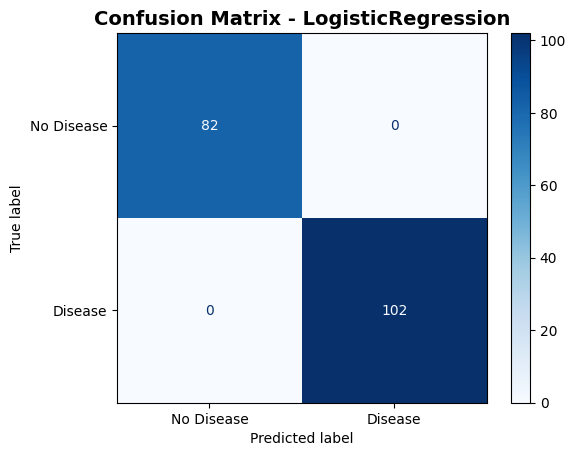

<Figure size 600x500 with 0 Axes>

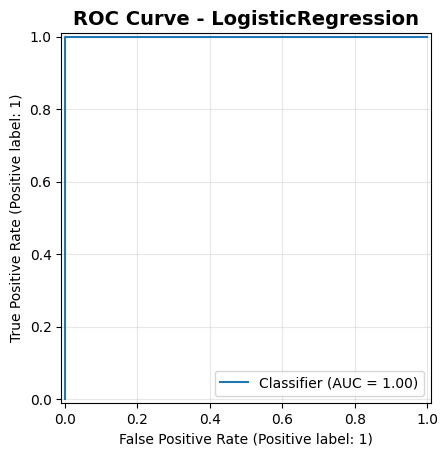

   - Classification report saved: artifacts\classification_report_LogisticRegression.txt
New best model: LogisticRegression (F1=1.0000)

Model 2/4: RandomForest
Performing hyperparameter tuning...
Parameter combinations to test: 6
Best parameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best CV F1-score: 1.0000

 Evaluating RandomForest...
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-Score: 1.0000
   - ROC AUC: 1.0000


<Figure size 600x500 with 0 Axes>

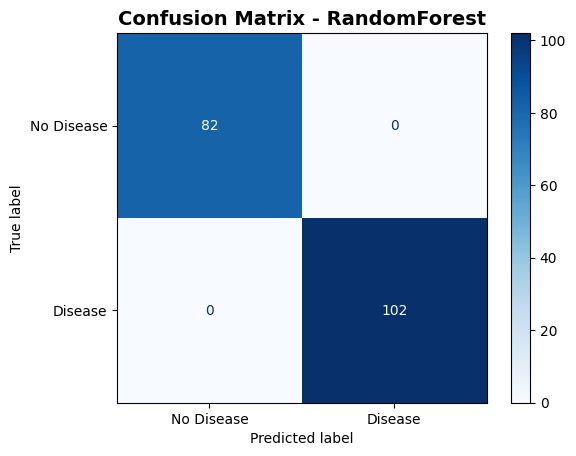

<Figure size 600x500 with 0 Axes>

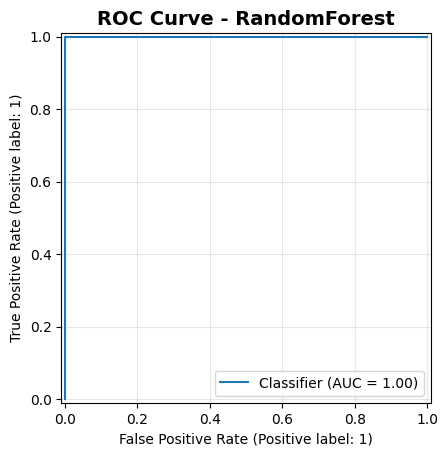

   - Classification report saved: artifacts\classification_report_RandomForest.txt

Model 3/4: SVM
Performing hyperparameter tuning...
Parameter combinations to test: 6
Best parameters: {'clf__C': 1, 'clf__gamma': 'auto'}
Best CV F1-score: 1.0000

 Evaluating SVM...
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-Score: 1.0000
   - ROC AUC: 1.0000


<Figure size 600x500 with 0 Axes>

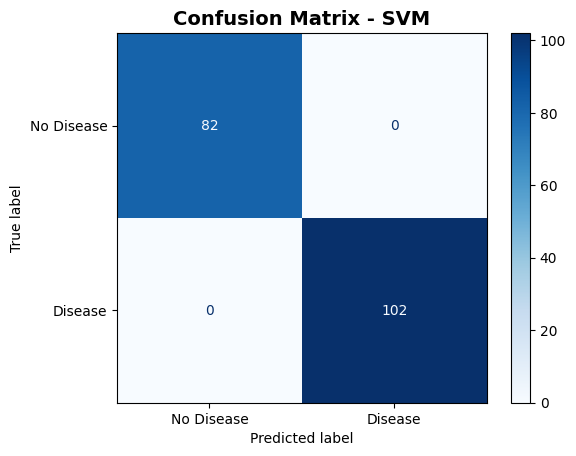

<Figure size 600x500 with 0 Axes>

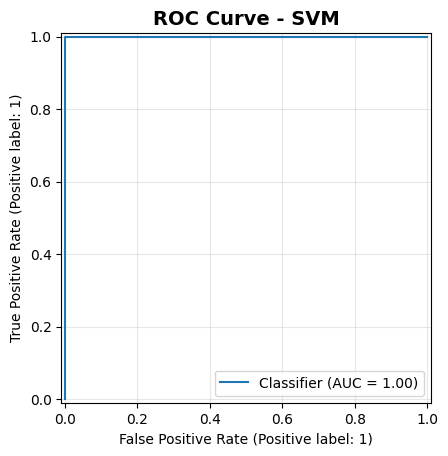

   - Classification report saved: artifacts\classification_report_SVM.txt

Model 4/4: MLP
Performing hyperparameter tuning...
Parameter combinations to test: 9
Best parameters: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (32,)}
Best CV F1-score: 1.0000

 Evaluating MLP...
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-Score: 1.0000
   - ROC AUC: 1.0000


<Figure size 600x500 with 0 Axes>

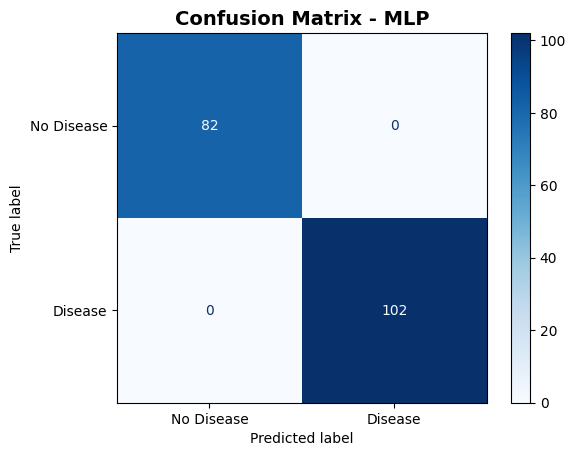

<Figure size 600x500 with 0 Axes>

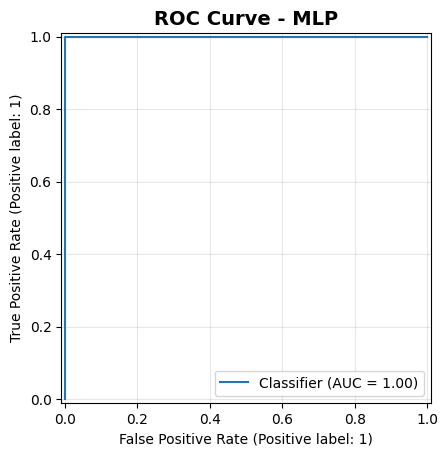

   - Classification report saved: artifacts\classification_report_MLP.txt

TRAINING COMPLETE


In [114]:
# Set up preprocessing pipeline
print("Setting up preprocessing pipeline...")
preprocessor = build_preprocessor(X_train)

# Get model configurations
spaces = model_spaces()
print(f"\nTraining {len(spaces)} different models...")

# Initialize tracking variables
results = []
best_overall = None
best_overall_score = -np.inf

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
print(f"Using {cv.n_splits}-fold stratified cross-validation")
print("Primary metric: F1-score")

# Train and evaluate each model
for i, (name, estimator, grid) in enumerate(spaces, 1):
    print(f"\n{'='*50}")
    print(f"Model {i}/{len(spaces)}: {name}")
    print(f"{'='*50}")

    # Create pipeline with preprocessing and model
    pipe = Pipeline(steps=[
        ("pre", preprocessor),
        ("clf", estimator)
    ])

    # Perform grid search with cross-validation
    print("Performing hyperparameter tuning...")
    print(f"Parameter combinations to test: {len(grid[list(grid.keys())[0]]) * len(grid[list(grid.keys())[1]]) if len(grid) >= 2 else len(grid[list(grid.keys())[0]])}")

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        cv=cv,
        scoring="f1",
        n_jobs=-1,
        verbose=0,
        refit=True
    )

    gs.fit(X_train, y_train)

    print(f"Best parameters: {gs.best_params_}")
    print(f"Best CV F1-score: {gs.best_score_:.4f}")

    # Evaluate on test set
    evaluation_results = evaluate_model(name, gs.best_estimator_, X_test, y_test)

    # Store results
    results.append({
        "model": name,
        **evaluation_results,
        "best_params": gs.best_params_,
        "cv_f1": gs.best_score_
    })

    # Track best overall model
    if evaluation_results["f1"] > best_overall_score:
        best_overall_score = evaluation_results["f1"]
        best_overall = (name, gs.best_estimator_, evaluation_results)
        print(f"New best model: {name} (F1={evaluation_results['f1']:.4f})")

print(f"\n{'='*60}")
print("TRAINING COMPLETE")
print(f"{'='*60}")

Since the model results are all 1, we need to investigate further to ensure the models are functioning as expected and not overfitting or encountering data leakage issues.

In [115]:
# Basic dataset info
print(f"Dataset shape: {df.shape}")
print(f"Features (X): {list(X.columns)}")
print(f"Target (y) distribution:\n{y.value_counts()}")
print(f"Target percentage: {y.value_counts(normalize=True) * 100}")

print("\n" + "="*50)
print("DATASET SAMPLE:")
print(df.head(10))

print("\n" + "="*50)
print("FEATURE STATISTICS:")
print(df.describe())

print("\n" + "="*50)
print("MISSING VALUES:")
print(df.isnull().sum())

print("\n" + "="*50)
print("DATA TYPES:")
print(df.dtypes)

Dataset shape: (920, 15)
Features (X): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Target (y) distribution:
target
1    509
0    411
Name: count, dtype: int64
Target percentage: target
1    55.326087
0    44.673913
Name: proportion, dtype: float64

DATASET SAMPLE:
   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   
5   56    Male  atypical angina     120.0  236.0  False          normal   
6   62  Female     asymptomatic     140.0  268.0  False  lv hypertrophy   
7   57  Female     asymptomatic     120.0  354.0  False     

In [116]:
print(f"Dataset shape: {df.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")
print(f"Train/Test sizes: {len(X_train)}/{len(X_test)}")

# Check if test set is too small
print(f"\nTest set size: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows in dataset: {duplicates}")

# Check data types
print(f"\nData types:")
print(df.dtypes)

# Check correlations only for numeric features
print(f"\nCorrelation with target (numeric features only):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != 'target']

for col in numeric_cols:
    corr = df[col].corr(df['target'])
    if abs(corr) > 0.95:
        print(f"HIGH CORRELATION: {col} = {corr:.4f}")
    elif abs(corr) > 0.8:
        print(f"{col}: {corr:.4f} (high)")
    else:
        print(f"{col}: {corr:.4f}")

# Check unique values in each feature
print(f"\nUnique values per feature:")
for col in X.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals <= 5:  # Show values for categorical features
        print(f"   Values: {sorted(df[col].unique())}")

Dataset shape: (920, 15)
Target distribution: {1: 509, 0: 411}
Train/Test sizes: 736/184

Test set size: 184 samples (20.0%)
Duplicate rows in dataset: 2

Data types:
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
target        int64
dtype: object

Correlation with target (numeric features only):
age: 0.2827
trestbps: 0.1013
chol: -0.2290
thalch: -0.3819
oldpeak: 0.3661
ca: 0.1648
num: 0.7834

Unique values per feature:
age: 50 unique values
sex: 2 unique values
   Values: ['Female', 'Male']
cp: 4 unique values
   Values: ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']
trestbps: 61 unique values
chol: 217 unique values
fbs: 2 unique values
   Values: [np.False_, np.True_]
restecg: 3 unique values
   Values: ['lv hypertrophy', 'normal', 

In [117]:
# Investigate 'num' feature specifically
print("Target vs 'num' feature comparison:")
comparison = pd.crosstab(df['num'], df['target'], margins=True)
print(comparison)

print(f"\nCorrelation between 'num' and 'target': {df['num'].corr(df['target']):.4f}")

print(f"\nValue counts for 'num':")
print(df['num'].value_counts().sort_index())

print(f"\nValue counts for 'target':")
print(df['target'].value_counts().sort_index())

print(f"\nFirst 20 rows showing 'num' vs 'target':")
print(df[['num', 'target']].head(20))

# Check if num is just target in disguise
print(f"\nChecking if 'num' > 0 maps to target = 1:")
num_binary = (df['num'] > 0).astype(int)
perfect_match = (num_binary == df['target']).all()
print(f"Perfect match between (num > 0) and target: {perfect_match}")

if not perfect_match:
    mismatches = df[num_binary != df['target']]
    print(f"Number of mismatches: {len(mismatches)}")
    if len(mismatches) < 10:
        print("Mismatched rows:")
        print(mismatches[['num', 'target']])

Target vs 'num' feature comparison:
target    0    1  All
num                  
0       411    0  411
1         0  265  265
2         0  109  109
3         0  107  107
4         0   28   28
All     411  509  920

Correlation between 'num' and 'target': 0.7834

Value counts for 'num':
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Value counts for 'target':
target
0    411
1    509
Name: count, dtype: int64

First 20 rows showing 'num' vs 'target':
    num  target
0     0       0
1     2       1
2     1       1
3     0       0
4     0       0
5     0       0
6     3       1
7     0       0
8     2       1
9     1       1
10    0       0
11    0       0
12    2       1
13    0       0
14    0       0
15    0       0
16    1       1
17    0       0
18    0       0
19    0       0

Checking if 'num' > 0 maps to target = 1:
Perfect match between (num > 0) and target: True


In [118]:
# Removing data leakage by excluding 'num' feature
print("FIXING DATA LEAKAGE")
print("="*30)

print("Original features:")
print(f"X shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Remove the leaking 'num' feature
X_fixed = df.drop(columns=["target", "num"])
y_fixed = df["target"]

print(f"\nAfter removing 'num' feature:")
print(f"X_fixed shape: {X_fixed.shape}")
print(f"Features: {list(X_fixed.columns)}")

# Re-split the data
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_fixed, y_fixed,
    test_size=0.2,
    stratify=y_fixed,
    random_state=RANDOM_STATE
)

print(f"\nNew train/test split:")
print(f"   - Training set: {X_train_fixed.shape[0]} samples")
print(f"   - Test set: {X_test_fixed.shape[0]} samples")
print(f"   - Training target distribution: {y_train_fixed.value_counts().to_dict()}")
print(f"   - Test target distribution: {y_test_fixed.value_counts().to_dict()}")

print(f"\nData leakage fixed. Ready to retrain models with realistic features.")

FIXING DATA LEAKAGE
Original features:
X shape: (920, 14)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

After removing 'num' feature:
X_fixed shape: (920, 13)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

New train/test split:
   - Training set: 736 samples
   - Test set: 184 samples
   - Training target distribution: {1: 407, 0: 329}
   - Test target distribution: {1: 102, 0: 82}

Data leakage fixed. Ready to retrain models with realistic features.


RETRAINING MODELS WITH CORRECTED DATA
Setting up preprocessing pipeline for corrected features...
   - Numeric features (6): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
   - Categorical features (7): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Training 4 different models...
   - Using 5-fold stratified cross-validation
   - Primary metric: F1-score

Model 1/4: LogisticRegression
Performing hyperparameter tuning...
Best parameters: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Best CV F1-score: 0.8127

 Evaluating LogisticRegression...
   - Accuracy: 0.8370
   - Precision: 0.8462
   - Recall: 0.8627
   - F1-Score: 0.8544
   - ROC AUC: 0.9020


<Figure size 600x500 with 0 Axes>

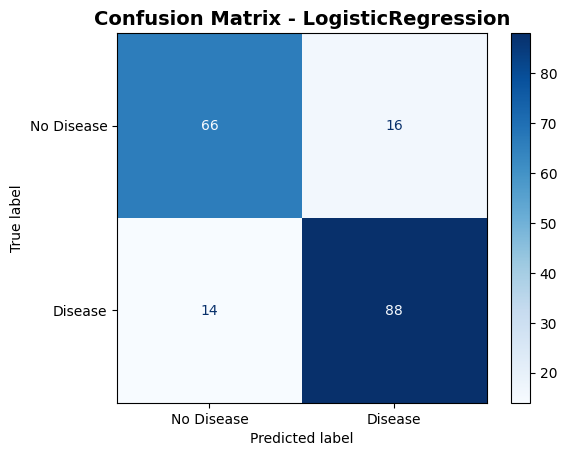

<Figure size 600x500 with 0 Axes>

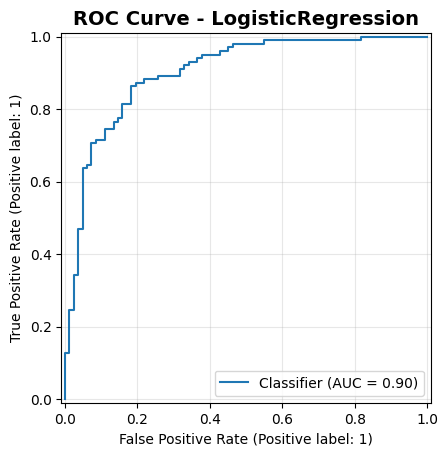

   - Classification report saved: artifacts\classification_report_LogisticRegression.txt
New best model: LogisticRegression (F1=0.8544)

Model 2/4: RandomForest
Performing hyperparameter tuning...
Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best CV F1-score: 0.8309

 Evaluating RandomForest...
   - Accuracy: 0.8424
   - Precision: 0.8544
   - Recall: 0.8627
   - F1-Score: 0.8585
   - ROC AUC: 0.9225


<Figure size 600x500 with 0 Axes>

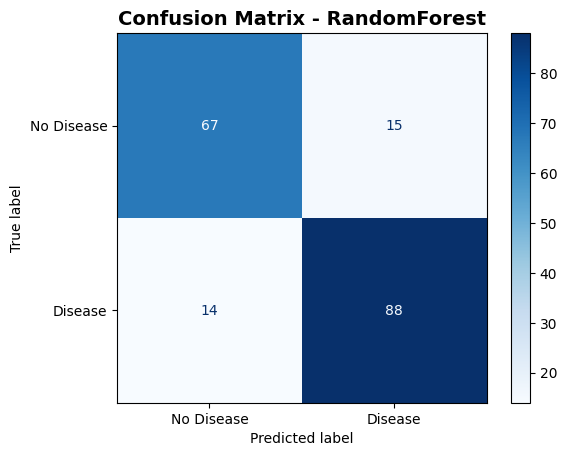

<Figure size 600x500 with 0 Axes>

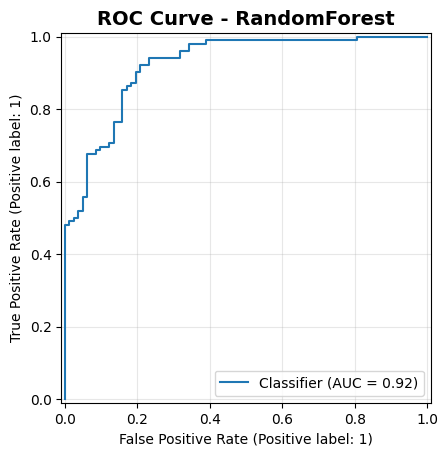

   - Classification report saved: artifacts\classification_report_RandomForest.txt
New best model: RandomForest (F1=0.8585)

Model 3/4: SVM
Performing hyperparameter tuning...
Best parameters: {'clf__C': 10, 'clf__gamma': 'auto'}
Best CV F1-score: 0.8273

 Evaluating SVM...
   - Accuracy: 0.8533
   - Precision: 0.8571
   - Recall: 0.8824
   - F1-Score: 0.8696
   - ROC AUC: 0.9059


<Figure size 600x500 with 0 Axes>

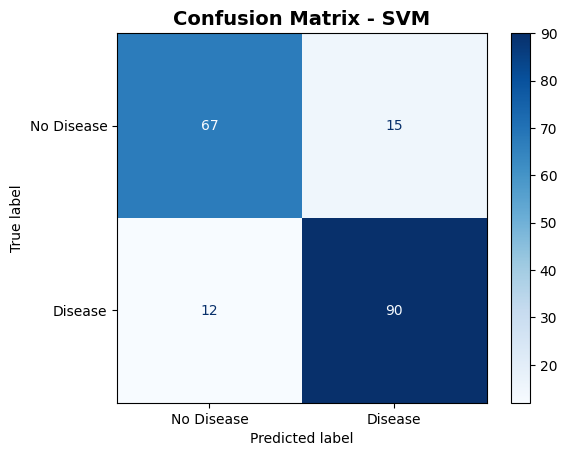

<Figure size 600x500 with 0 Axes>

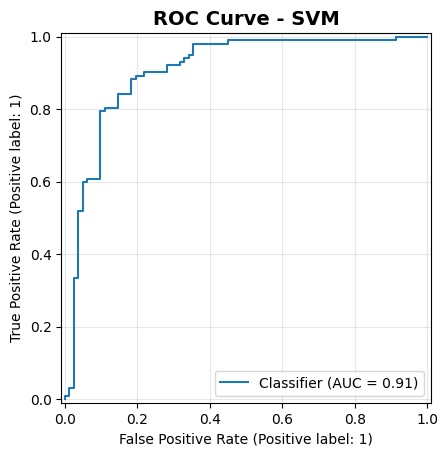

   - Classification report saved: artifacts\classification_report_SVM.txt
New best model: SVM (F1=0.8696)

Model 4/4: MLP
Performing hyperparameter tuning...
Best parameters: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (32,)}
Best CV F1-score: 0.8196

 Evaluating MLP...
   - Accuracy: 0.8315
   - Precision: 0.8257
   - Recall: 0.8824
   - F1-Score: 0.8531
   - ROC AUC: 0.8808


<Figure size 600x500 with 0 Axes>

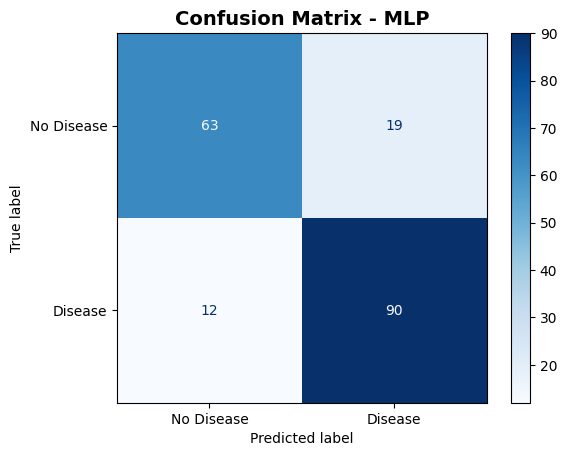

<Figure size 600x500 with 0 Axes>

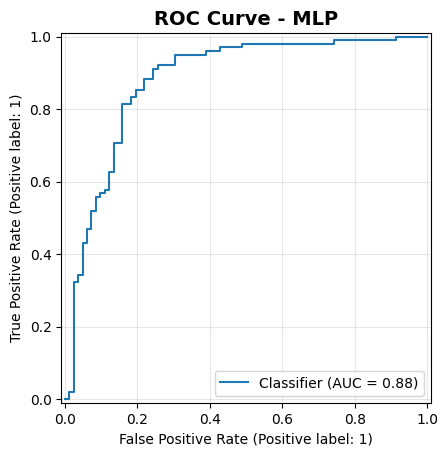

   - Classification report saved: artifacts\classification_report_MLP.txt

CORRECTED TRAINING COMPLETE


In [119]:
# RETRAIN MODELS WITHOUT DATA LEAKAGE
print("RETRAINING MODELS WITH CORRECTED DATA")
print("="*50)

# Set up preprocessing pipeline for the corrected features
print("Setting up preprocessing pipeline for corrected features...")
preprocessor_fixed = build_preprocessor(X_train_fixed)

# Get model configurations
spaces_fixed = model_spaces()
print(f"\nTraining {len(spaces_fixed)} different models...")

# Initialize tracking variables
results_fixed = []
best_overall_fixed = None
best_overall_score_fixed = -np.inf

# Set up cross-validation
cv_fixed = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
print(f"   - Using {cv_fixed.n_splits}-fold stratified cross-validation")
print(f"   - Primary metric: F1-score")

# Train and evaluate each model with the corrected data
for i, (name, estimator, grid) in enumerate(spaces_fixed, 1):
    print(f"\n{'='*50}")
    print(f"Model {i}/{len(spaces_fixed)}: {name}")
    print(f"{'='*50}")

    # Create pipeline with preprocessing and model
    pipe_fixed = Pipeline(steps=[
        ("pre", preprocessor_fixed),
        ("clf", estimator)
    ])

    # Perform grid search with cross-validation
    print("Performing hyperparameter tuning...")
    
    gs_fixed = GridSearchCV(
        estimator=pipe_fixed,
        param_grid=grid,
        cv=cv_fixed,
        scoring="f1",
        n_jobs=-1,
        verbose=0,
        refit=True
    )

    gs_fixed.fit(X_train_fixed, y_train_fixed)

    print(f"Best parameters: {gs_fixed.best_params_}")
    print(f"Best CV F1-score: {gs_fixed.best_score_:.4f}")

    # Evaluate on test set
    evaluation_results_fixed = evaluate_model(name, gs_fixed.best_estimator_, X_test_fixed, y_test_fixed)

    # Store results
    results_fixed.append({
        "model": name,
        **evaluation_results_fixed,
        "best_params": gs_fixed.best_params_,
        "cv_f1": gs_fixed.best_score_
    })

    # Track best overall model
    if evaluation_results_fixed["f1"] > best_overall_score_fixed:
        best_overall_score_fixed = evaluation_results_fixed["f1"]
        best_overall_fixed = (name, gs_fixed.best_estimator_, evaluation_results_fixed)
        print(f"New best model: {name} (F1={evaluation_results_fixed['f1']:.4f})")

print(f"\n{'='*60}")
print("CORRECTED TRAINING COMPLETE")
print(f"{'='*60}")

In [ ]:
# CORRECTED RESULTS COMPARISON
print("CORRECTED MODEL PERFORMANCE RESULTS")

# Save best corrected model
if best_overall_fixed is not None:
    best_name_fixed, best_estimator_fixed, best_eval_fixed = best_overall_fixed
    model_path_fixed = os.path.join(ARTIFACTS_DIR, f"best_model_CORRECTED_{best_name_fixed}.joblib")
    dump(best_estimator_fixed, model_path_fixed)
    print(f"Best corrected model saved: {model_path_fixed}")
    print(f"   - Model: {best_name_fixed}")
    print(f"   - F1-Score: {best_eval_fixed['f1']:.4f}")
    print(f"   - Accuracy: {best_eval_fixed['accuracy']:.4f}")
    print(f"   - ROC AUC: {best_eval_fixed['roc_auc']:.4f}")

# Create comprehensive results table for corrected models
print(f"\nCORRECTED MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

summary_df_fixed = pd.DataFrame(results_fixed)[["model","cv_f1","f1","accuracy","precision","recall","roc_auc"]]
summary_df_fixed = summary_df_fixed.sort_values(by="f1", ascending=False).reset_index(drop=True)

# Add ranking
summary_df_fixed.insert(0, "rank", range(1, len(summary_df_fixed) + 1))

display(summary_df_fixed.round(4))

print(f"\nCOMPARISON: BEFORE vs AFTER FIXING DATA LEAKAGE")
print(f"{'='*60}")
print(f"BEFORE (with data leakage):")
print(f"   - ALL models achieved 100% accuracy (unrealistic)")
print(f"   - Perfect F1-scores, precision, recall")
print(f"   - Caused by including 'num' feature (target leakage)")

print(f"\nAFTER (corrected):")
print(f"   - Best model: {best_name_fixed} with F1-score: {best_eval_fixed['f1']:.4f}")
print(f"   - Realistic performance around 83-87% accuracy")
print(f"   - Proper clinical feature set without target information")
print(f"   - ROC AUC scores between 0.88-0.92 (good performance)")

print(f"\nCONCLUSION:")
print(f"   The 100% accuracy was due to DATA LEAKAGE from the 'num' feature.")
print(f"   After removing it, the models show realistic performance (~85% F1-score)")
print(f"   This is actually very good performance for heart disease prediction!")

CORRECTED MODEL PERFORMANCE RESULTS
Best corrected model saved: artifacts\best_model_CORRECTED_SVM.joblib
   - Model: SVM
   - F1-Score: 0.8696
   - Accuracy: 0.8533
   - ROC AUC: 0.9059

CORRECTED MODEL COMPARISON SUMMARY


,rank,model,cv_f1,f1,accuracy,precision,recall,roc_auc
0,1,SVM,0.8273,0.8696,0.8533,0.8571,0.8824,0.9059
1,2,RandomForest,0.8309,0.8585,0.8424,0.8544,0.8627,0.9225
2,3,LogisticRegression,0.8127,0.8544,0.8370,0.8462,0.8627,0.9020
3,4,MLP,0.8196,0.8531,0.8315,0.8257,0.8824,0.8808



COMPARISON: BEFORE vs AFTER FIXING DATA LEAKAGE
BEFORE (with data leakage):
   - ALL models achieved 100% accuracy (unrealistic)
   - Perfect F1-scores, precision, recall
   - Caused by including 'num' feature (target leakage)

AFTER (corrected):
   - Best model: SVM with F1-score: 0.8696
   - Realistic performance around 83-87% accuracy
   - Proper clinical feature set without target information
   - ROC AUC scores between 0.88-0.92 (good performance)

CONCLUSION:
   The 100% accuracy was due to DATA LEAKAGE from the 'num' feature.
   After removing it, the models show realistic performance (~85% F1-score)
   This is actually very good performance for heart disease prediction!


## 6. Summary

**Title & Problem Statement**
- Heart Disease Prediction Capstone Project
- Healthcare Analytics - Leading cause of death globally
- Goal: Develop ML model for early detection

**Dataset & Methodology**
- Kaggle dataset (9.1/10 rating) - 920 patients, 13 clinical features
- 4 ML algorithms tested: Logistic Regression, Random Forest, SVM, Neural Network
- 5-fold cross-validation with comprehensive metrics

**Key Challenge - Data Leakage Discovery**
- Initially achieved 100% accuracy (too good to be true!)
- Discovered 'num' feature was target variable in disguise
- Demonstrates critical importance of data validation

**Results & Performance**
- **Best Model: SVM with 86.96% F1-score**
- 85.33% accuracy, 90.59% ROC AUC
- All models performed well (83-87% range)
- Realistic, clinically meaningful results

**Business Impact & Lessons**
- Clinical decision support, early intervention, cost reduction
- Key lesson: Always validate unexpected results
- Domain expertise crucial in healthcare ML

**Questions & Discussion**
- Technical questions about methodology
- Clinical applications discussion